In [2]:
import os
from collections import defaultdict

import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np
sns.set()
import re

In [14]:
def get_metrics(
        logs_path,
        # custom_metrics_names=("final_sum_of_revealed_cards_0_mean",),
        hist_stats_names=("policy_main_reward", "win_rate", "final_sum_of_revealed_cards_0", "final_sum_of_revealed_cards_1", "final_score_0", "final_score_1") #, "final_sum_of_revealed_cards_2"
):
    files = [os.path.join(logs_path, f) for f in os.listdir(logs_path) if os.path.isfile(os.path.join(logs_path, f)) and f.startswith('result_iteration_')]
    files.sort(key=lambda var:[int(x) if x.isdigit() else x for x in re.findall(r'[^0-9]|[0-9]+', var)])

    custom_metrics = defaultdict(list)
    hist_stats = defaultdict(list)
    for file in files:
        with open(file) as f:
            d = json.load(f)
            # for cm in custom_metrics_names:
            #     custom_metrics[cm].append(np.array(d["env_runners"]["custom_metrics"][cm]))
            for hist_stat in hist_stats_names:
                hist_stats[hist_stat].append(np.array(d["env_runners"]["hist_stats"][hist_stat]))
                hist_stats[hist_stat+"_mean"].append(np.mean(hist_stats[hist_stat][-1]))
                hist_stats[hist_stat+"_min"].append(np.mean(hist_stats[hist_stat][-1]))
                hist_stats[hist_stat+"_max"].append(np.mean(hist_stats[hist_stat][-1]))

    return custom_metrics, hist_stats

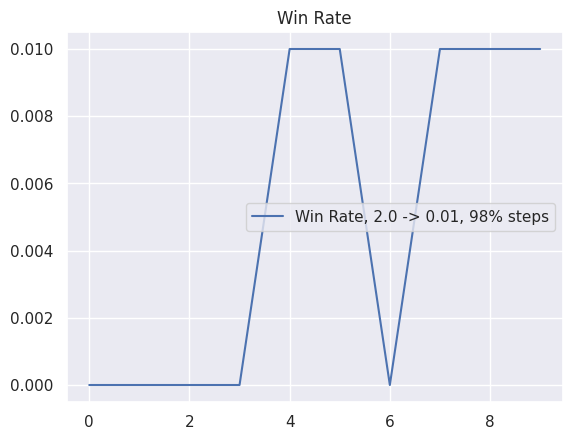

In [15]:
custom_metrics_adapt_098, hist_stats_adapt_098 = get_metrics("logs/grid_search/obs_simple_indirect_True_vf_True_cr_50.0_ar_1_decay_0.995_ent_0.01_lr_0.0001_nn_[2048, 2048, 1024, 512]")
plt.plot(hist_stats_adapt_098["win_rate"], label="Win Rate, 2.0 -> 0.01, 98% steps")
plt.title("Win Rate")
plt.legend()
plt.show()

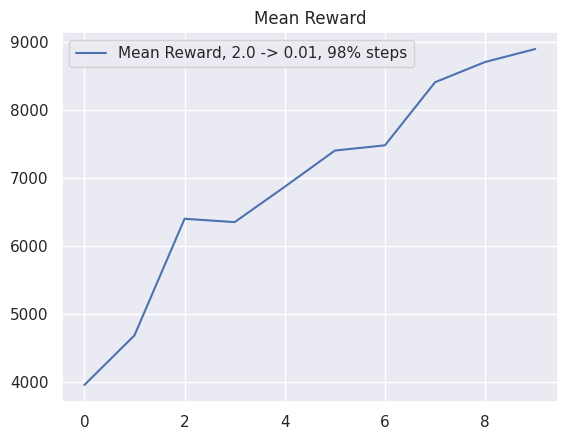

In [16]:
plt.plot(hist_stats_adapt_098["policy_main_reward_mean"], label="Mean Reward, 2.0 -> 0.01, 98% steps")
plt.title("Mean Reward")
plt.legend()
plt.show()

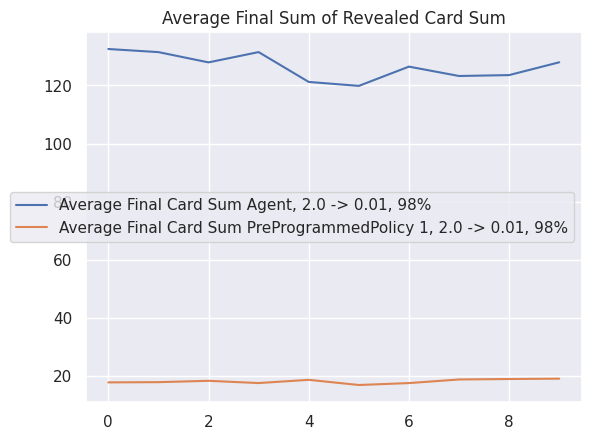

In [ ]:
plt.plot(hist_stats_adapt_098["final_score_0_mean"], label="Average Final Card Sum Agent, 2.0 -> 0.01, 98%")
plt.plot(hist_stats_adapt_098["final_score_1_mean"], label="Average Final Card Sum PreProgrammedPolicy 1, 2.0 -> 0.01, 98%")
#plt.plot(hist_stats_adapt_098["final_score_2_mean"], label="Average Final Card Sum PreProgrammedPolicy 2, 2.0 -> 0.01, 98%")
plt.title("Average Final Score")
plt.legend()
plt.show()

In [28]:
custom_metrics_adapt_098, hist_stats_adapt_098 = get_metrics("logs/logs6")
custom_metrics_const, hist_stats_const = get_metrics("logs/logs7")
custom_metrics_adapt_0999, hist_stats_const_0999 = get_metrics("logs/logs8")
custom_metrics_adapt_095, hist_stats_const_095 = get_metrics("logs/logs9")

KeyError: 'win_rate'

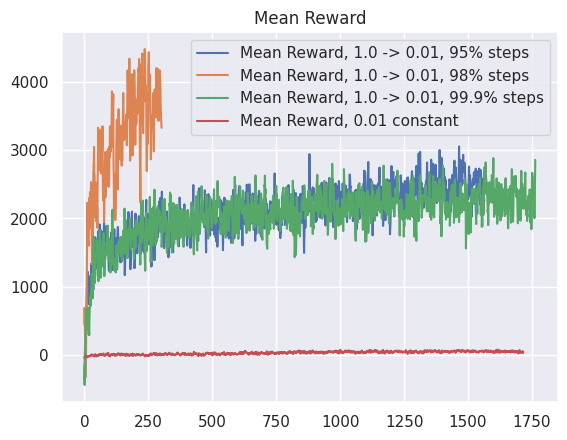

In [29]:
plt.plot(hist_stats_const_095["policy_main_reward_mean"], label="Mean Reward, 1.0 -> 0.01, 95% steps")
plt.plot(hist_stats_adapt_098["policy_main_reward_mean"], label="Mean Reward, 1.0 -> 0.01, 98% steps")
plt.plot(hist_stats_const_0999["policy_main_reward_mean"], label="Mean Reward, 1.0 -> 0.01, 99.9% steps")
plt.plot(hist_stats_const["policy_main_reward_mean"], label="Mean Reward, 0.01 constant")
plt.title("Mean Reward")
plt.legend()
plt.show()

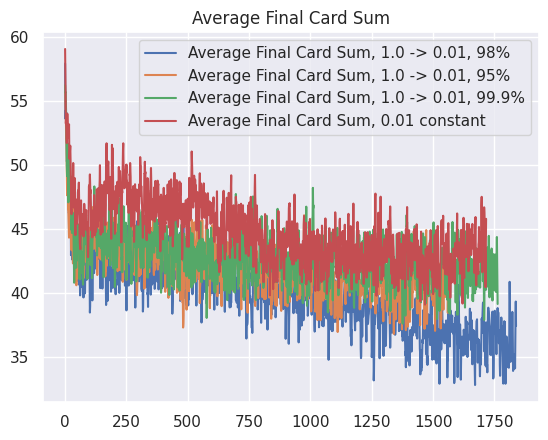

In [ ]:
plt.plot(custom_metrics_adapt_098["final_sum_of_revealed_cards_0_mean"], label="Average Final Card Sum, 1.0 -> 0.01, 98%")
plt.plot(custom_metrics_adapt_095["final_sum_of_revealed_cards_0_mean"], label="Average Final Card Sum, 1.0 -> 0.01, 95%")
plt.plot(custom_metrics_adapt_0999["final_sum_of_revealed_cards_0_mean"], label="Average Final Card Sum, 1.0 -> 0.01, 99.9%")
plt.plot(custom_metrics_const["final_sum_of_revealed_cards_0_mean"], label="Average Final Card Sum, 0.01 constant")
plt.title("Average Final Card Sum")
plt.legend()
plt.show()

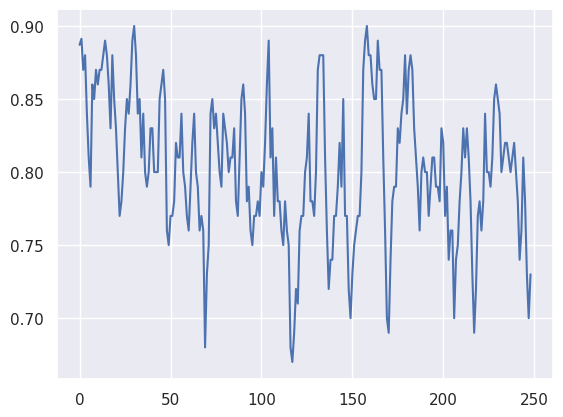

In [18]:
win_rate = [0.887097,
0.891304,
0.870000,
0.880000,
0.840000,
0.810000,
0.790000,
0.860000,
0.850000,
0.870000,
0.860000,
0.870000,
0.870000,
0.880000,
0.890000,
0.880000,
0.860000,
0.830000,
0.880000,
0.850000,
0.830000,
0.800000,
0.770000,
0.780000,
0.800000,
0.830000,
0.850000,
0.840000,
0.860000,
0.890000,
0.900000,
0.880000,
0.840000,
0.850000,
0.810000,
0.840000,
0.800000,
0.790000,
0.800000,
0.830000,
0.830000,
0.800000,
0.800000,
0.800000,
0.850000,
0.860000,
0.870000,
0.850000,
0.760000,
0.750000,
0.770000,
0.770000,
0.780000,
0.820000,
0.810000,
0.810000,
0.840000,
0.800000,
0.790000,
0.770000,
0.760000,
0.790000,
0.820000,
0.840000,
0.800000,
0.790000,
0.760000,
0.770000,
0.760000,
0.680000,
0.730000,
0.750000,
0.840000,
0.850000,
0.830000,
0.840000,
0.820000,
0.800000,
0.790000,
0.840000,
0.830000,
0.820000,
0.800000,
0.810000,
0.810000,
0.830000,
0.780000,
0.770000,
0.810000,
0.850000,
0.860000,
0.840000,
0.780000,
0.790000,
0.760000,
0.750000,
0.770000,
0.770000,
0.780000,
0.770000,
0.800000,
0.790000,
0.820000,
0.860000,
0.890000,
0.810000,
0.830000,
0.770000,
0.810000,
0.780000,
0.780000,
0.760000,
0.750000,
0.780000,
0.760000,
0.750000,
0.680000,
0.670000,
0.690000,
0.720000,
0.710000,
0.760000,
0.770000,
0.770000,
0.800000,
0.810000,
0.840000,
0.780000,
0.780000,
0.770000,
0.800000,
0.870000,
0.880000,
0.880000,
0.880000,
0.810000,
0.760000,
0.720000,
0.740000,
0.740000,
0.770000,
0.770000,
0.790000,
0.820000,
0.790000,
0.850000,
0.770000,
0.770000,
0.720000,
0.700000,
0.730000,
0.750000,
0.760000,
0.770000,
0.770000,
0.800000,
0.870000,
0.890000,
0.900000,
0.880000,
0.880000,
0.860000,
0.850000,
0.850000,
0.890000,
0.870000,
0.870000,
0.810000,
0.760000,
0.700000,
0.690000,
0.740000,
0.780000,
0.790000,
0.790000,
0.830000,
0.820000,
0.840000,
0.850000,
0.880000,
0.840000,
0.870000,
0.880000,
0.870000,
0.830000,
0.810000,
0.790000,
0.760000,
0.800000,
0.810000,
0.800000,
0.800000,
0.770000,
0.790000,
0.810000,
0.810000,
0.790000,
0.790000,
0.780000,
0.830000,
0.820000,
0.770000,
0.790000,
0.740000,
0.760000,
0.760000,
0.700000,
0.740000,
0.750000,
0.780000,
0.800000,
0.830000,
0.810000,
0.830000,
0.810000,
0.780000,
0.730000,
0.690000,
0.720000,
0.770000,
0.780000,
0.760000,
0.780000,
0.840000,
0.800000,
0.800000,
0.790000,
0.810000,
0.850000,
0.860000,
0.850000,
0.840000,
0.800000,
0.810000,
0.820000,
0.820000,
0.810000,
0.800000,
0.810000,
0.820000,
0.800000,
0.780000,
0.740000,
0.760000,
0.810000,
0.780000,
0.730000,
0.700000,
0.730000,]

plt.plot(win_rate)
